# BTS data Quick Analysis for Carpatians Mountains
S. Filhol, Jan 2021

Data provided by Răzvan Popescu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (15, 5)

In [7]:
bts = pd.read_csv('../data/BTS/BTS_aspect-altitude.csv')
print(bts.head())
bts.Range.unique()

   BTS  Elevation Aspect    Range
0 -5.4       1997  north  Retezat
1 -3.9       1999  north  Retezat
2 -2.8       1979  north  Retezat
3 -2.5       1976  north  Retezat
4 -2.1       1990  north  Retezat


array(['Retezat', 'Parang', 'Făgăraș-Iezer'], dtype=object)

## Preliminary visualization of the data

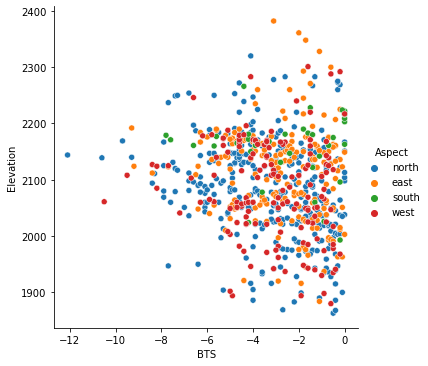

In [68]:
sns.relplot(data=bts, x='BTS', y='Elevation', hue='Aspect')

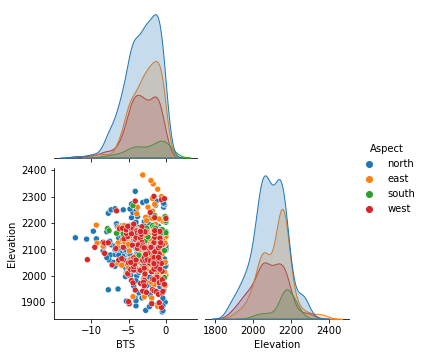

In [69]:
sns.pairplot(bts, hue='Aspect', corner=True)

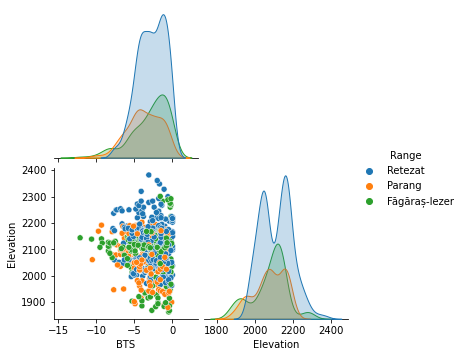

In [70]:
sns.pairplot(bts, hue='Range', corner=True)

With those three plots we see that the BTS measurements are mostly concentrated around 2000-2200. This will likely be an issue, or at least it needs to be carefully considered when interpreting the plots below. As well we see large discrepency in representation for the various aspects, north being the most represented.

Depending of the goal of the analysis and how you interpret the results, we could think of ways to normalize the data.

<AxesSubplot:xlabel='Aspect', ylabel='count'>

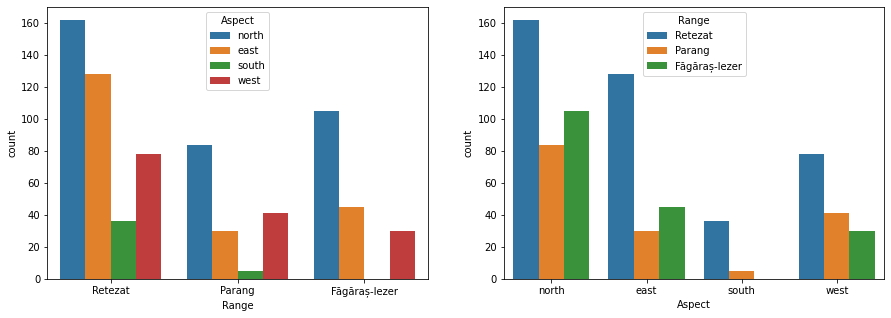

In [71]:
# let's do a quick check of the total number of BTS per Range-Aspect, and Aspect-Range
fig, axs = plt.subplots(1,2)
sns.countplot(data=bts, x='Range', hue='Aspect', ax=axs[0])
sns.countplot(data=bts, x='Aspect', hue='Range', ax=axs[1])

## Elevation Dependency

In [72]:
# groupby elevation band and BTS values
elev_band = np.arange(1850,2400,50)
bts['Elevation_band'] = pd.cut(bts.Elevation, bins=elev_band)
bts_band = np.arange(-13,0,1)
bts['BTS_band'] = pd.cut(bts.BTS, bins=bts_band)

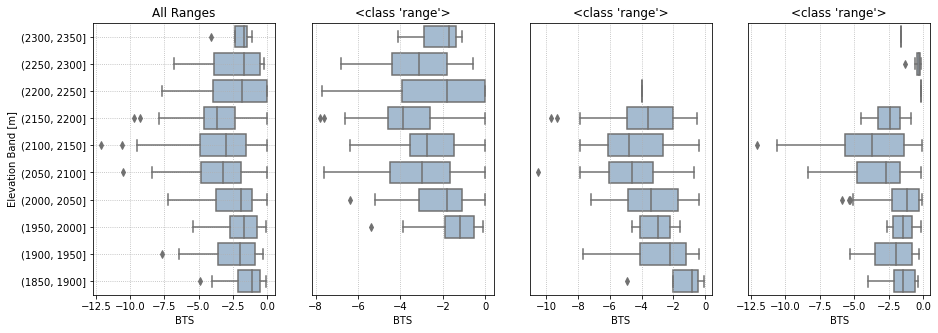

In [73]:
# plot elevation dependency of BTS  with boxplot

fig, ax = plt.subplots(1,4)
col = sns.color_palette("ch:s=.25,rot=-.25")[1]
bp = sns.boxplot(x='BTS', y='Elevation_band', data=bts, orient='h', ax=ax[0], color=col)
bp.invert_yaxis()
ax[0].set_title("All Ranges")
ax[0].set_ylabel('Elevation Band [m]')
ax[0].grid(linestyle=':')
for i,rangeM in enumerate(bts.Range.unique()):
    bp = sns.boxplot(x='BTS', y='Elevation_band', data=bts.loc[bts.Range==rangeM], orient='h', ax=ax[i+1],color=col)
    bp.invert_yaxis()
    ax[i+1].set_title(rangeM)
    ax[i+1].get_yaxis().set_visible(False)
    ax[i+1].grid(linestyle=':')

Here we might see some dependency of BTS with elevation but still this is very noisy. Also notice now that we show boxplot with the median shown as the middle bar, the "bell" signal you had is mostly gone, or at least greatly reduced. I think this is due to the fact that taking the mean per elevation band will be highly sensitive to outliers. Indeed, nothing indicates that the BTS per bands should be normaly distributed, so the median is a more robust aggregation method.

Text(0.5, 0.98, 'BTS Measurement Counts')

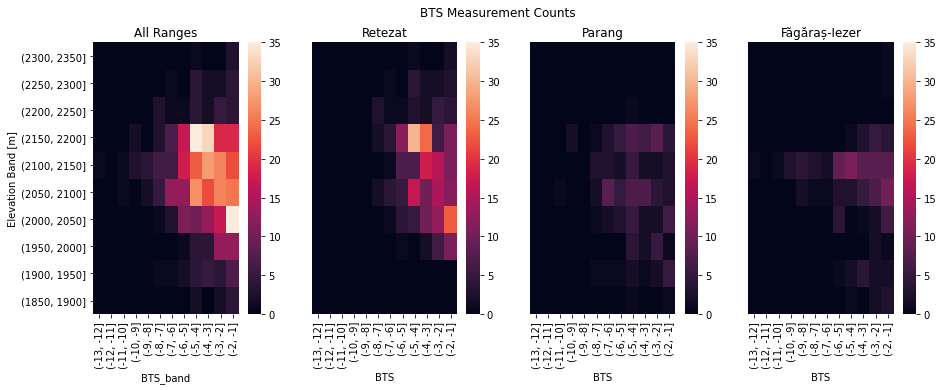

In [74]:
# plot number measurements with BTS vs Elevation

fig, ax = plt.subplots(1,4)
col = sns.color_palette("ch:s=.25,rot=-.25")[1]
bp = sns.heatmap(bts.BTS.groupby([bts.Elevation_band,bts.BTS_band]).count().unstack(), ax=ax[0], vmin=0,vmax=35)
bp.invert_yaxis()
ax[0].set_title("All Ranges")
ax[0].set_ylabel('Elevation Band [m]')
for i,rangeM in enumerate(bts.Range.unique()):
    bp = bp = sns.heatmap(bts.BTS.loc[bts.Range==rangeM].groupby([pd.cut(bts.Elevation.loc[bts.Range==rangeM], bins=elev_band),
                                                                 pd.cut(bts.BTS.loc[bts.Range==rangeM], bins=bts_band)]).count().unstack(),
                          ax=ax[i+1],
                         vmin=0,vmax=35)
    #bp = sns.boxplot(x='BTS', y='Elevation_band', data=bts.loc[bts.Range==range], orient='h', ax=ax[i+1],color=col)
    bp.invert_yaxis()
    ax[i+1].set_title(rangeM)
    ax[i+1].get_yaxis().set_visible(False)
fig.suptitle('BTS Measurement Counts')

Here I counted the nimber of measruement falling in one of the pixel. This is just another way to visualize the same data. I show the entire dataset together, and then split per mountain range. What I find interesting in this plot is the "front" of minimum BTS that seem to propagate with elevation. Also, we see the noise within the BTS measurements. Would snow depth be the main driver for this noise? 

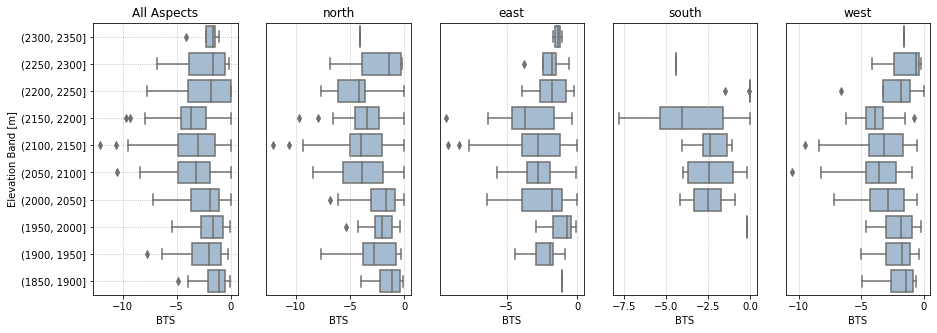

In [78]:
fig, ax = plt.subplots(1,5)
col = sns.color_palette("ch:s=.25,rot=-.25")[1]
bp = sns.boxplot(x='BTS', y='Elevation_band', data=bts, orient='h', ax=ax[0], color=col)
bp.invert_yaxis()
ax[0].set_title("All Aspects")
ax[0].set_ylabel('Elevation Band [m]')
ax[0].grid(linestyle=':')
for i,aspect in enumerate(bts.Aspect.unique()):
    bp = sns.boxplot(x='BTS', y='Elevation_band', data=bts.loc[bts.Aspect==aspect], orient='h', ax=ax[i+1],color=col)
    bp.invert_yaxis()
    ax[i+1].set_title(aspect)
    ax[i+1].get_yaxis().set_visible(False)
    ax[i+1].grid(linestyle=':')

The overall dependency of BTS to Elevation by aspect shows some relationship for the northern aspect, but little can be deduced for other aspects. Anything above 2200m should be considered carefully (even discarded in a statistical modeling) as we only have very few data points. 

Text(0.5, 0.98, 'BTS Measurement Counts')

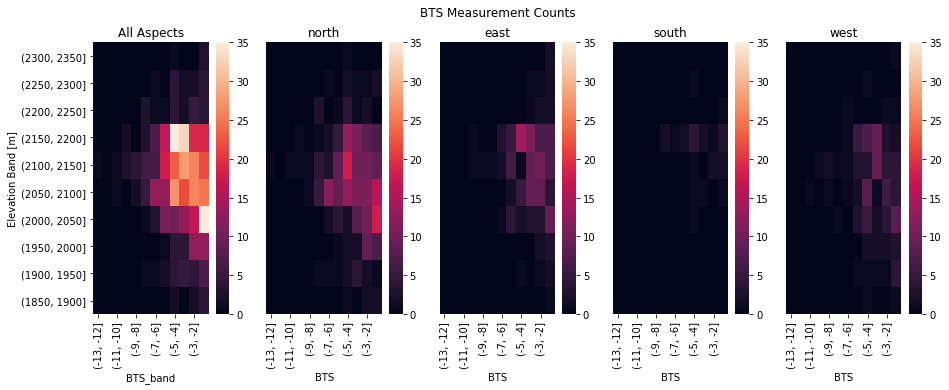

In [77]:
# plot number measurements with BTS vs Elevation

fig, ax = plt.subplots(1,5)
col = sns.color_palette("ch:s=.25,rot=-.25")[1]
bp = sns.heatmap(bts.BTS.groupby([bts.Elevation_band,bts.BTS_band]).count().unstack(), ax=ax[0], vmin=0,vmax=35)
bp.invert_yaxis()
ax[0].set_title("All Aspects")
ax[0].set_ylabel('Elevation Band [m]')
for i,aspect in enumerate(bts.Aspect.unique()):
    bp = bp = sns.heatmap(bts.BTS.loc[bts.Aspect==aspect].groupby([pd.cut(bts.Elevation.loc[bts.Aspect==aspect], bins=elev_band),
                                                                 pd.cut(bts.BTS.loc[bts.Aspect==aspect], bins=bts_band)]).count().unstack(),
                          ax=ax[i+1],
                         vmin=0,vmax=35)
    #bp = sns.boxplot(x='BTS', y='Elevation_band', data=bts.loc[bts.Range==range], orient='h', ax=ax[i+1],color=col)
    bp.invert_yaxis()
    ax[i+1].set_title(aspect)
    ax[i+1].get_yaxis().set_visible(False)
fig.suptitle('BTS Measurement Counts')